In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [111]:
def MH_sample_normal(true_samples, MH_samples, true_mean=0, true_sd=1, mean_init=0, proposal_sd=.5, mean_prior=0, sd_prior=1.):
    data = np.random.randn(true_samples)
    
    mean_current = mean_init
    mean_posterior = [mean_current]
    for i in range(MH_samples):
        #sample from current mean position
        mean_proposal = norm(mean_current, proposal_sd).rvs()
        
        #P(x|u0)
        likelihood_current = norm(mean_current, 1).pdf(data).prod()
        #P(x|u)
        likelihood_proposal = norm(mean_proposal, 1).pdf(data).prod()
    
        #P(u0)
        prior_current = norm(mean_prior, sd_prior).pdf(mean_current)
        #P(u)
        prior_proposal = norm(mean_prior, sd_prior).pdf(mean_proposal)
        
        #P(x|u0)P(u0)
        p_current = likelihood_current * prior_current
        #P(x|u)P(u)
        p_proposal = likelihood_proposal * prior_proposal
        
        #accept transition?
        p_accept = p_proposal / p_current
        accept = np.random.rand() < p_accept
        
        if accept:
            mean_current = mean_proposal
            
        mean_posterior.append(mean_current)
    
    return data, mean_posterior


In [145]:
data, mean_posterior = MH_sample_normal(500,2000)

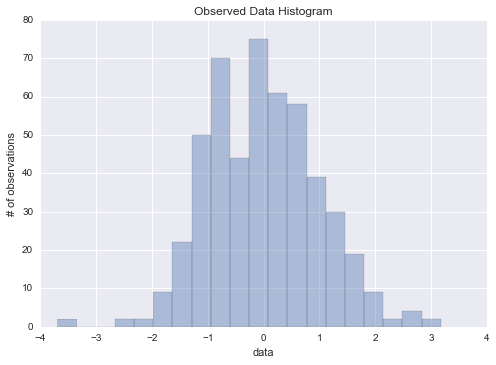

In [148]:
#plot data samples
ax = plt.subplot()
sns.distplot(data, ax=ax, kde=False)
ax.set(title="Observed Data Histogram", xlabel = 'data', ylabel='# of observations');

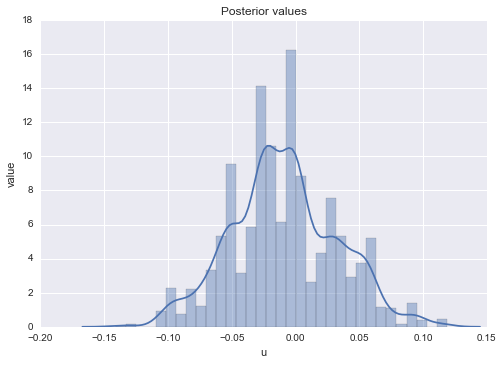

In [150]:
#plot posterior samples
ax = plt.subplot()
sns.distplot(mean_posterior, ax=ax, kde=True)
ax.set(title="Posterior values", xlabel = 'u', ylabel='value');

In [78]:
len(mean_posterior)

21

In [79]:
mean_posterior


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]